In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
projectPath = ('data/World Happiness Report.csv')

In [41]:
worldHappinessData = pd.read_csv(projectPath)
worldHappinessData


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703


In [42]:
#Find countries with the highest life expectancy at birth
#Use the LOG gdp Per capita to find happiest country by the gdp
#Countries with the highest confidence in national government
#countries with the highest perception of corruption
#life ladder is a scale from 0 to 10 in which respondents were to think of a ladder with the best possible life  being a 10 https://worldhappiness.report/faq/
50221

50221

In [43]:
worldHappinessData.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [44]:
# Number of countries.
country_count = len(worldHappinessData["Country Name"].unique())
country_count

165

In [45]:
# Remove duplicate rows
duplicates = worldHappinessData[worldHappinessData.duplicated(['Country Name', 'Year'])]
if len(duplicates) == 0:
    print("No duplicate rows.")
else:
    print("Duplicate rows")
    display(duplicates)

No duplicate rows.


In [60]:
averagesData =  worldHappinessData.groupby(['Country Name']).mean()
averagesData = averagesData.drop('Year', axis=1)
averagesSorted = averagesData.sort_values(by=['Life Ladder'],ascending=False)
averagesSorted.reset_index(inplace=True)
averagesSorted

,Country Name,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Denmark,7.673428,10.890561,0.957257,70.110588,0.943526,0.168008,0.198935,0.783842,0.198059,0.578037
1,Finland,7.619146,10.758259,0.952087,70.385334,0.942529,0.003297,0.241205,0.738976,0.185973,0.596645
2,Norway,7.481820,11.063554,0.948174,70.983334,0.951594,0.137959,0.334880,0.784108,0.201887,0.675312
3,Switzerland,7.474483,11.134667,0.937606,72.071666,0.917081,0.095792,0.298382,0.752893,0.188694,0.770718
4,Iceland,7.458607,10.882260,0.978529,71.842500,0.931095,0.249913,0.696371,0.806559,0.163893,0.428385
...,...,...,...,...,...,...,...,...,...,...,...
160,Rwanda,3.654473,7.427593,0.619421,57.570833,0.868012,0.012766,0.185955,0.692553,0.223807,0.969535
161,Burundi,3.548124,6.682296,0.417652,52.008000,0.451014,-0.034613,0.732270,0.570199,0.244124,0.725120
162,Central African Republic,3.514954,6.894669,0.402559,43.374000,0.680430,0.030658,0.842129,0.539942,0.391497,0.711735
163,South Sudan,3.401875,NaN,0.554719,53.101250,0.493705,NaN,0.749433,0.572469,0.486184,0.468385


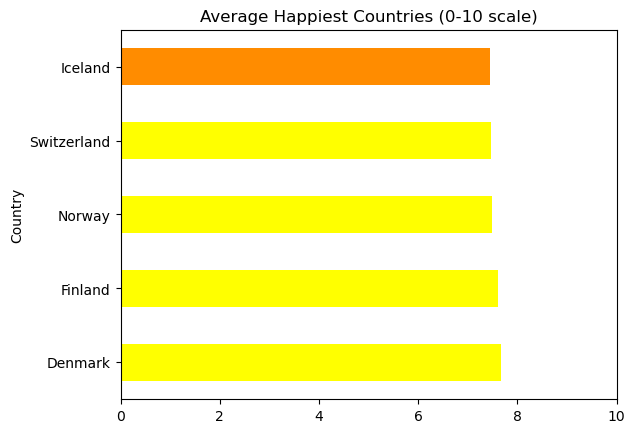

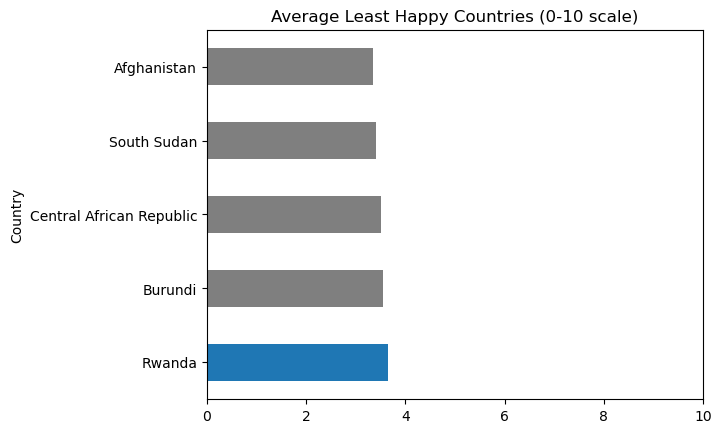

In [62]:
# graph the highest and lowest 5 average happiness scores
top_colors = ['yellow','yellow','yellow','yellow', 'darkorange']
bottom_colors = ['tab:blue','tab:gray','tab:gray','tab:gray','tab:gray']
ret = averagesSorted.iloc[0:5].plot(kind="barh", color=top_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title="Average Happiest Countries (0-10 scale)",xlim=[0,10])
plt.savefig("Output/AverageHappiestTop5")
ret = averagesSorted.iloc[-5:].plot(kind="barh", color=bottom_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title="Average Least Happy Countries (0-10 scale)",xlim=[0,10])
plt.savefig("Output/AverageHappiestBottom5")

In [63]:
# rank the top five and the bottom five by year and graph
ranksByYear = {}
years = sorted(worldHappinessData['Year'].unique().tolist())
# get the top five and bottom five countries based on Life Ladder by Year
for year in years:
    thisYear = worldHappinessData[worldHappinessData['Year'] == year].sort_values('Life Ladder')
    thisYearSubset = thisYear[['Country Name','Life Ladder']]
    thisYearRanked = pd.concat([thisYearSubset.iloc[0:5],thisYearSubset.iloc[-5:]], ignore_index=True) 
    ranksByYear[year] = thisYearRanked
ranksByYear

{2005:   Country Name  Life Ladder
 0      Turkiye     4.718734
 1      Romania     5.048648
 2        Egypt     5.167754
 3      Hungary     5.193933
 4     Pakistan     5.224658
 5    Australia     7.340688
 6       Sweden     7.376316
 7       Canada     7.418048
 8  Netherlands     7.463979
 9      Denmark     8.018934,
 2006:     Country Name  Life Ladder
 0           Togo     3.202429
 1          Benin     3.329802
 2           Chad     3.434801
 3       Cambodia     3.568745
 4   Sierra Leone     3.628185
 5  United States     7.181794
 6    New Zealand     7.305014
 7         Norway     7.415682
 8    Switzerland     7.473253
 9        Finland     7.672449,
 2007:     Country Name  Life Ladder
 0       Zimbabwe     3.280247
 1   Sierra Leone     3.585127
 2        Liberia     3.701401
 3        Georgia     3.707195
 4       Bulgaria     3.843798
 5    Netherlands     7.451880
 6         Canada     7.481753
 7  United States     7.512688
 8    New Zealand     7.604173
 9        

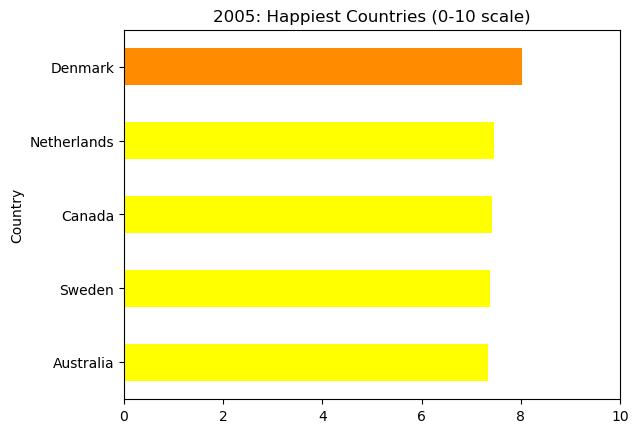

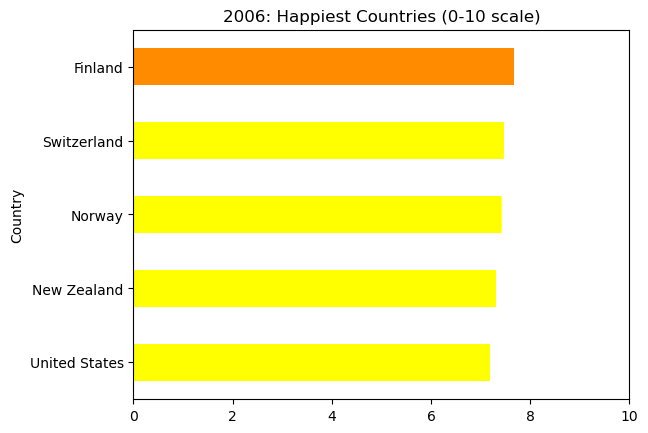

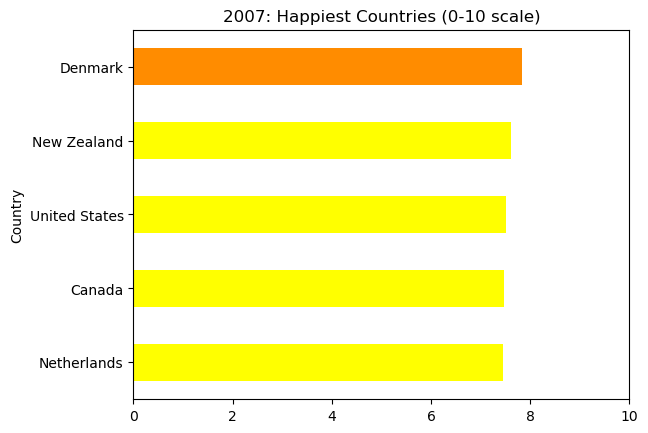

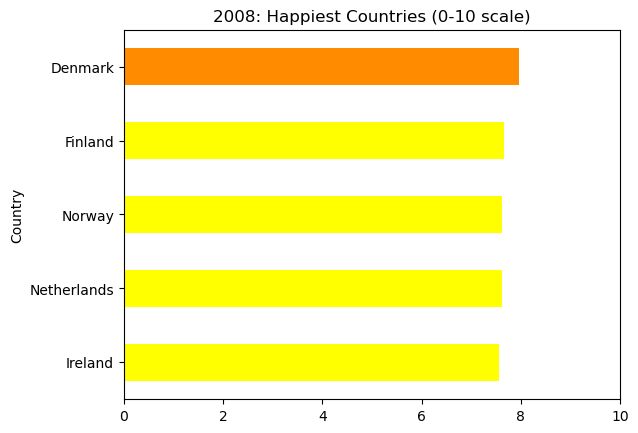

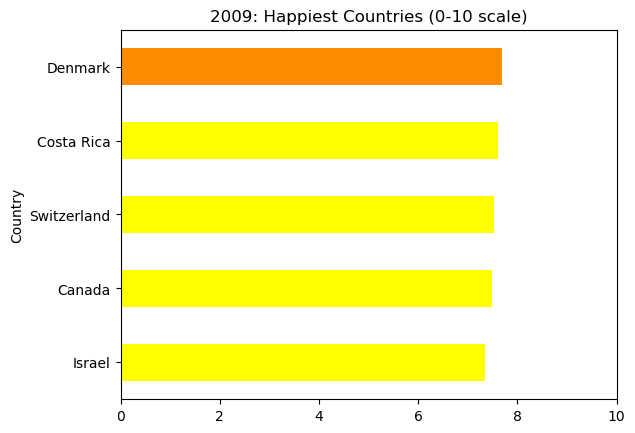

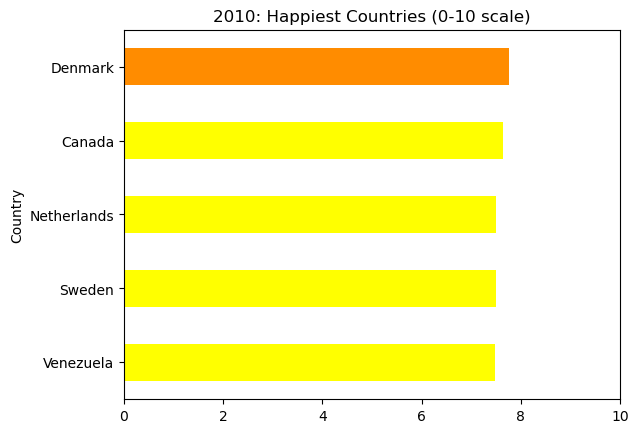

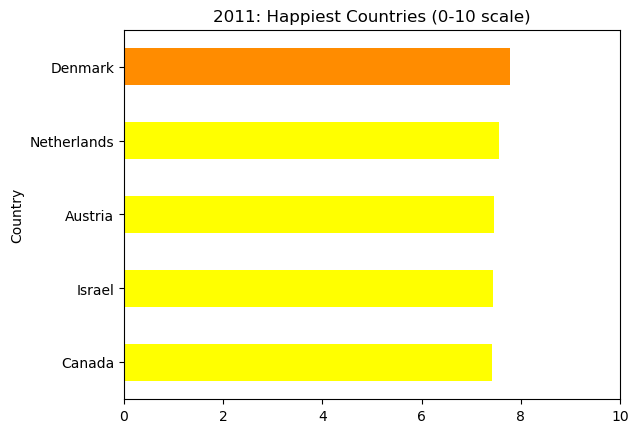

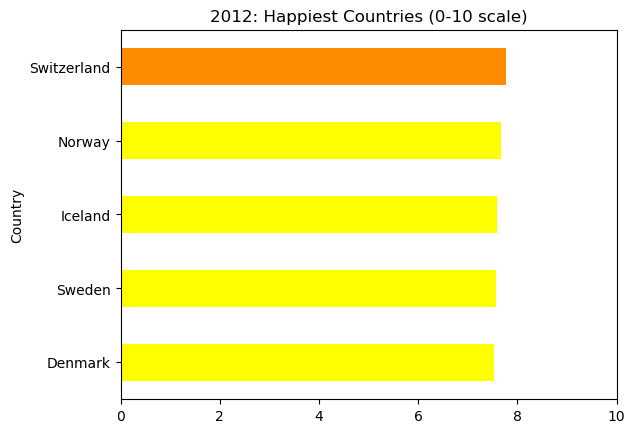

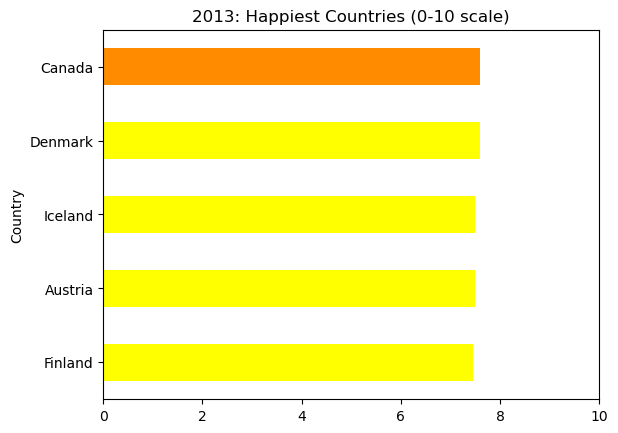

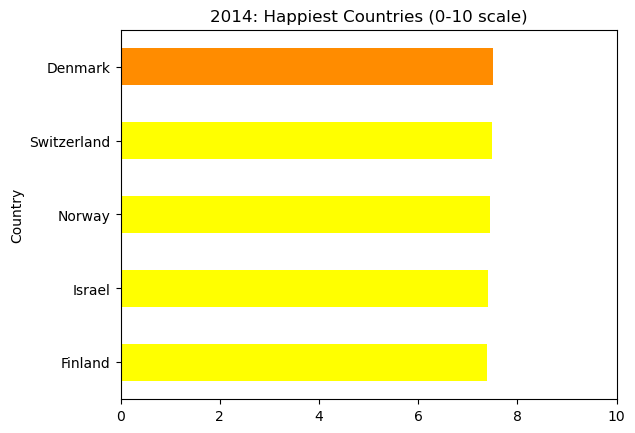

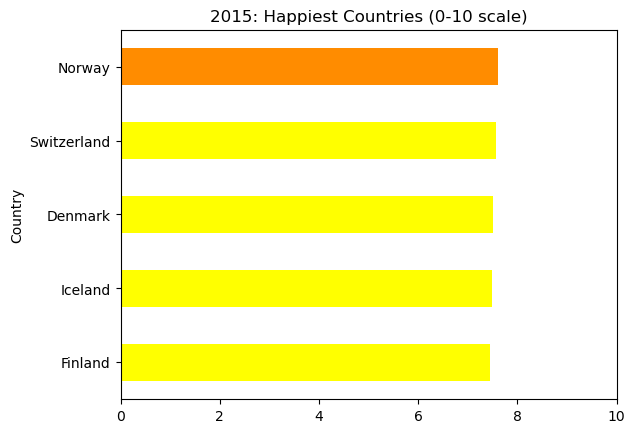

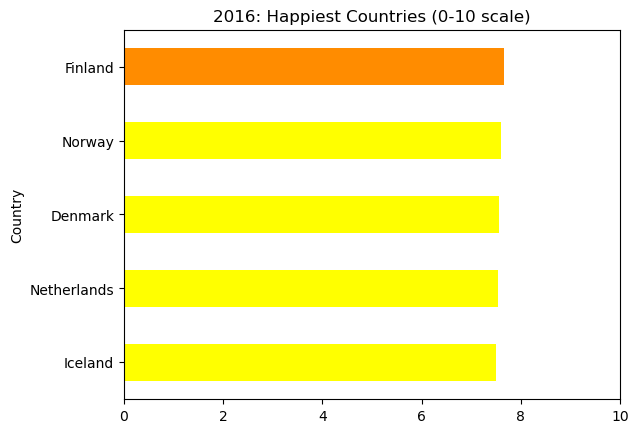

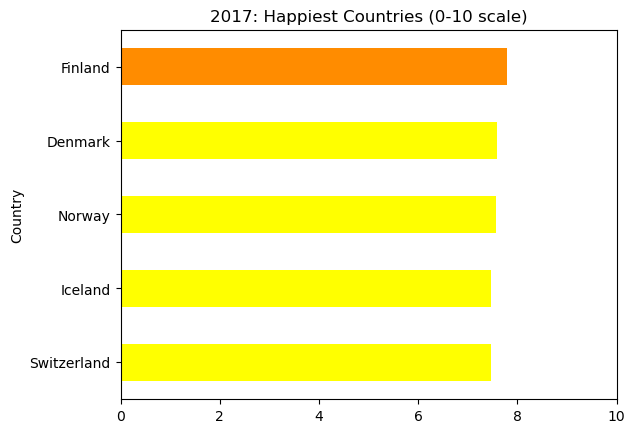

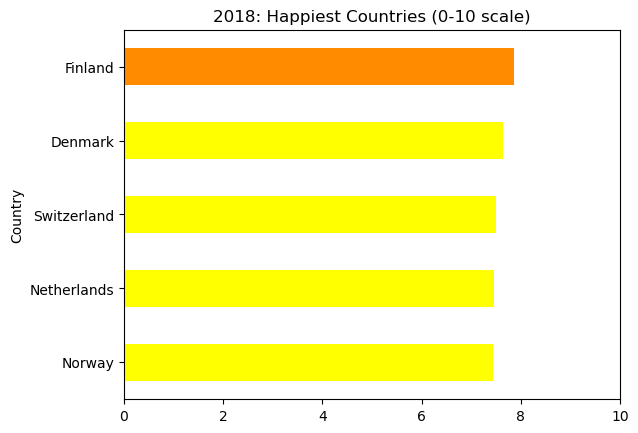

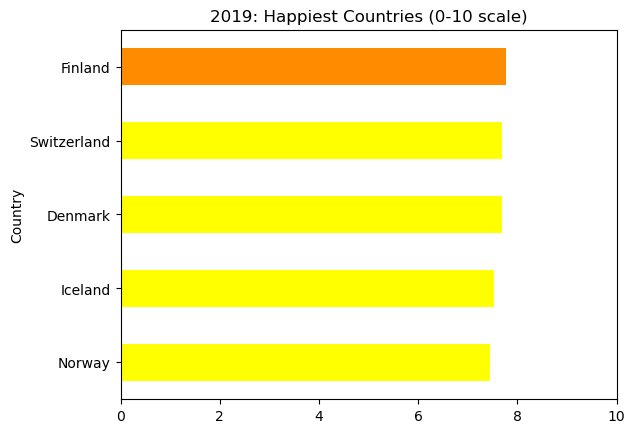

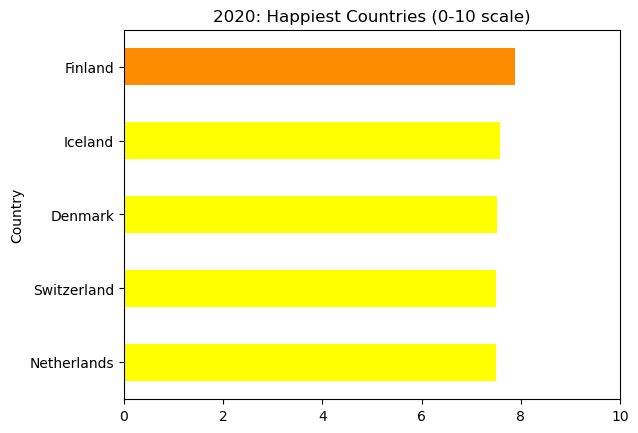

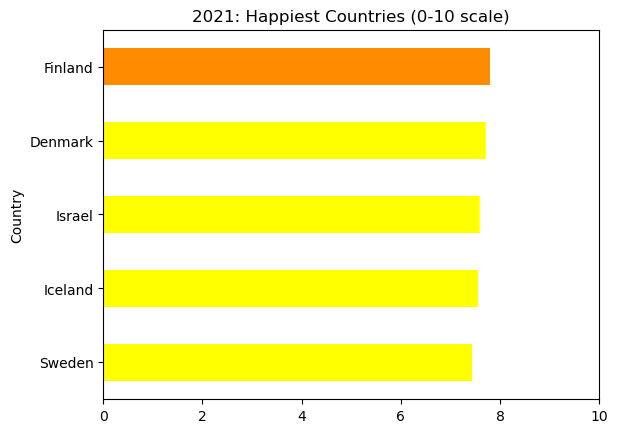

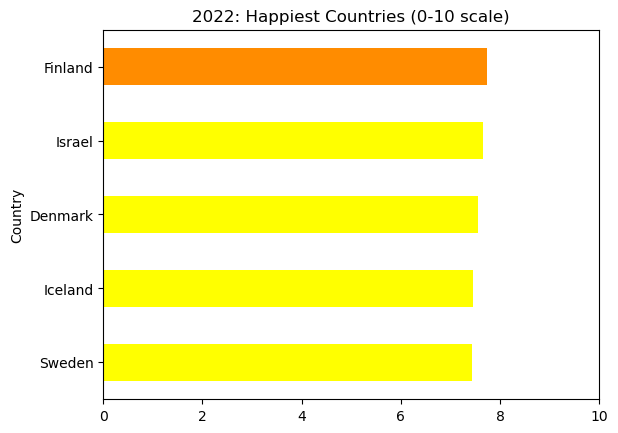

In [64]:
for year in years:
    ret = ranksByYear[year].iloc[-5:].plot(kind="barh", color=top_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title= str(year) + ": Happiest Countries (0-10 scale)",xlim=[0,10])
    filename = str(year) + "HappiestTop5"
    plt.savefig("Output/" + filename)

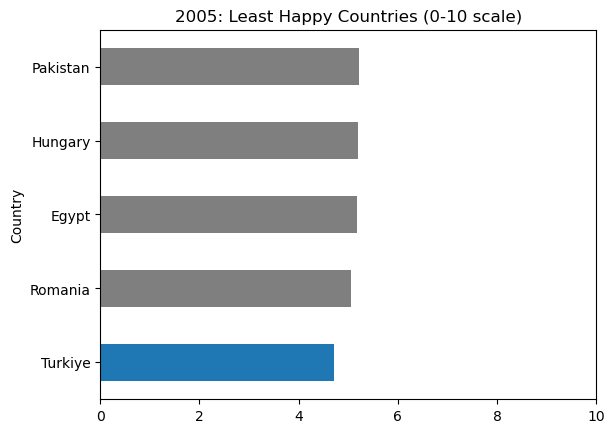

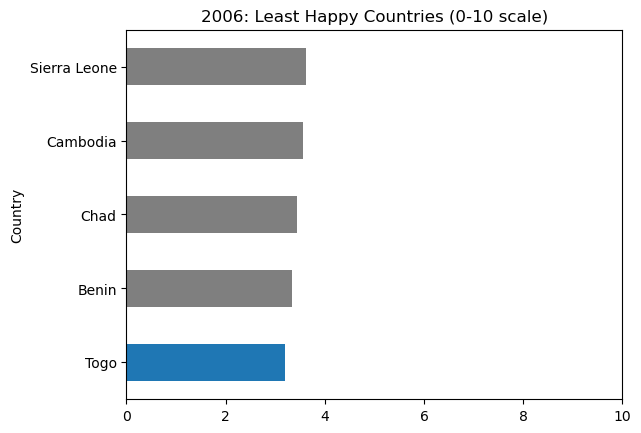

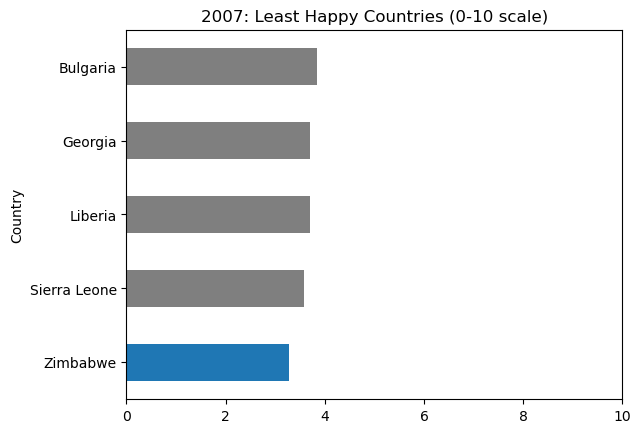

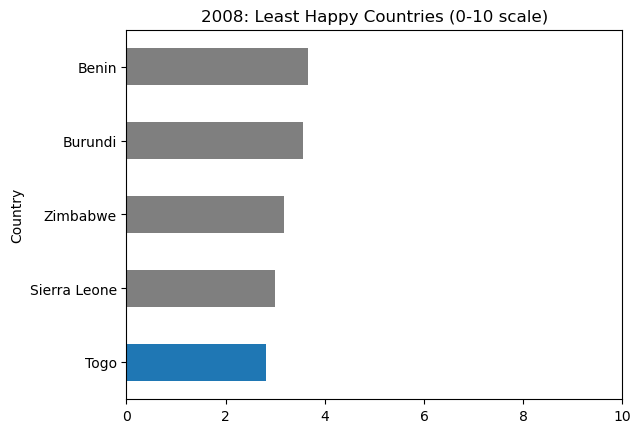

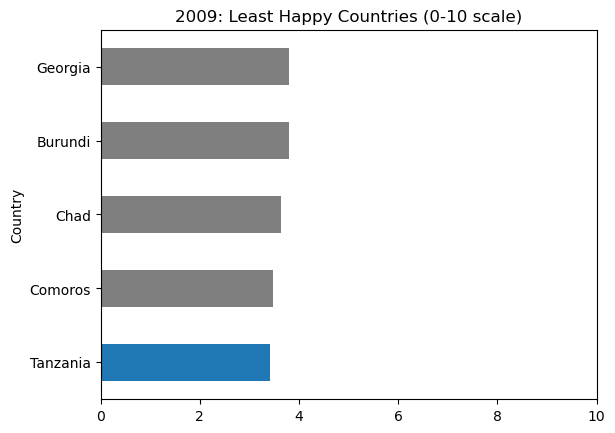

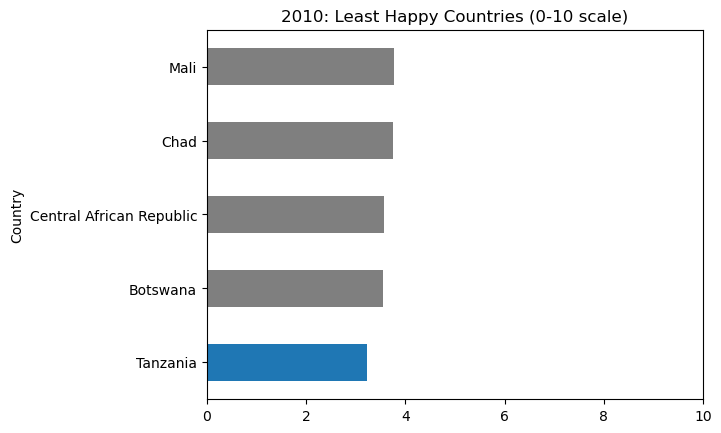

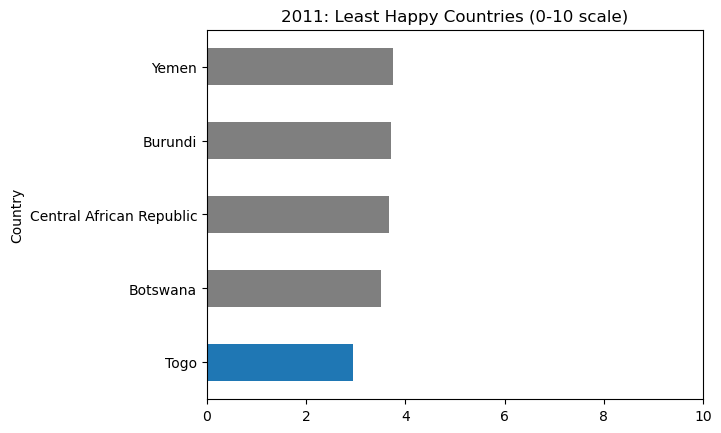

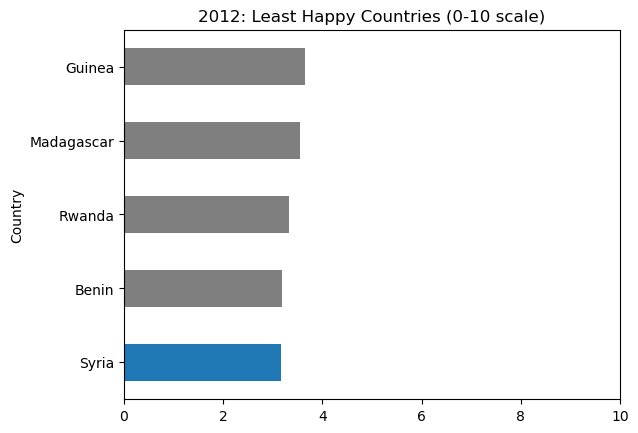

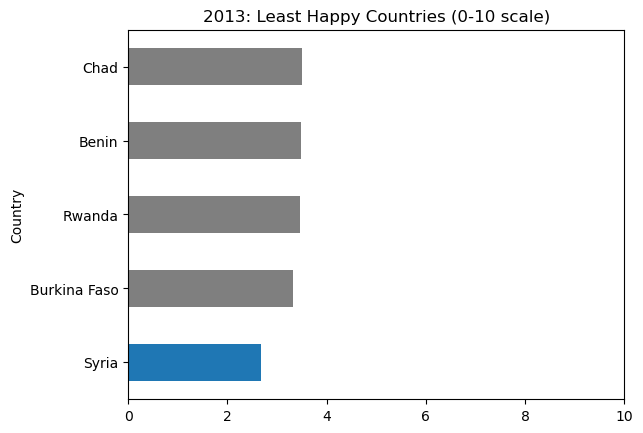

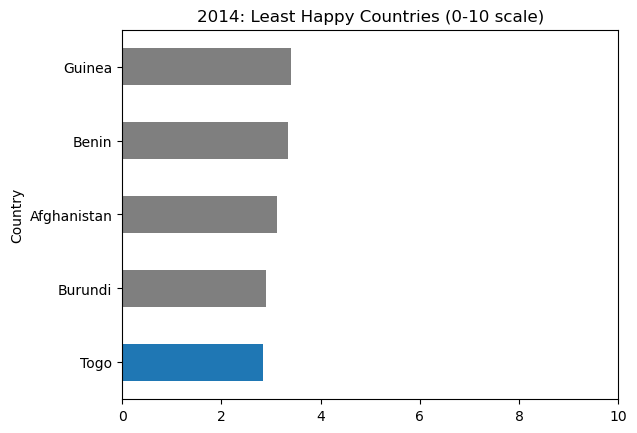

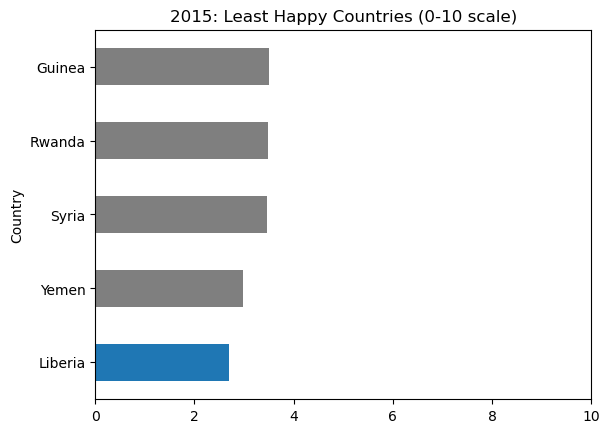

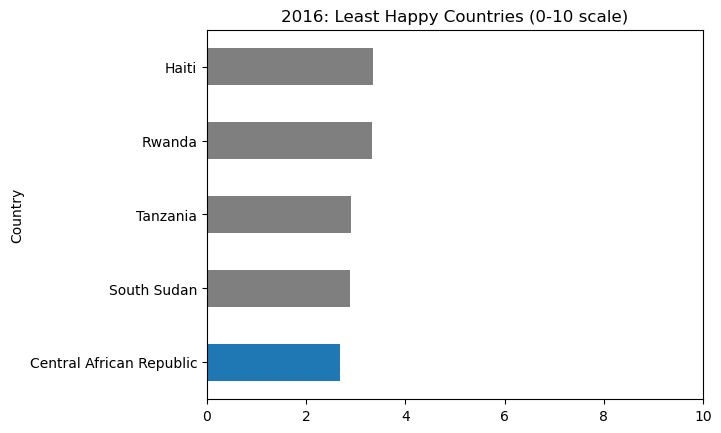

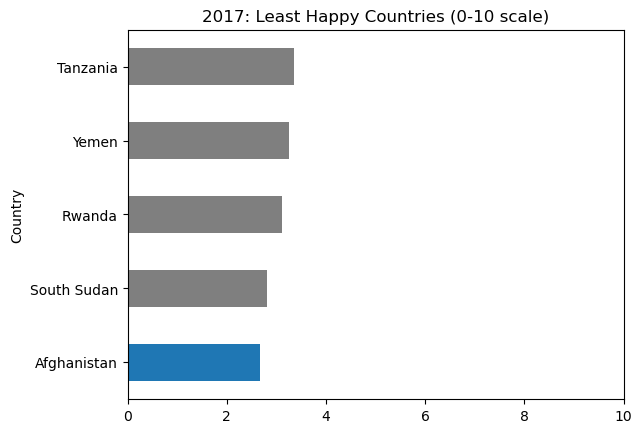

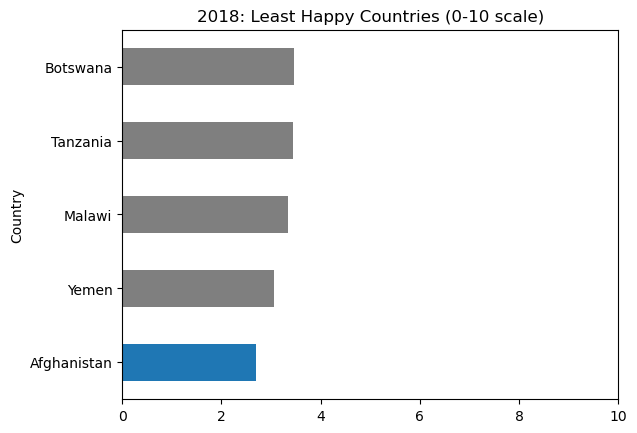

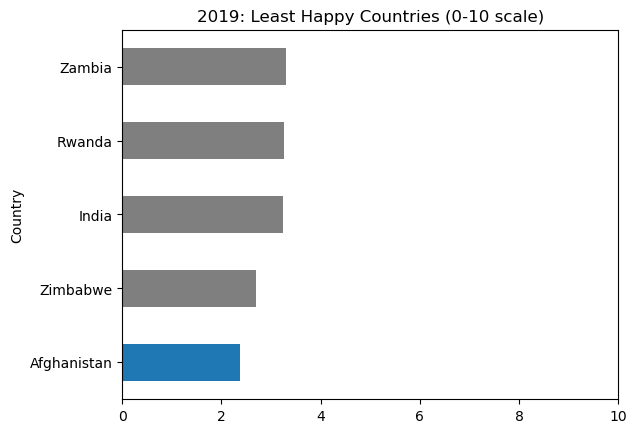

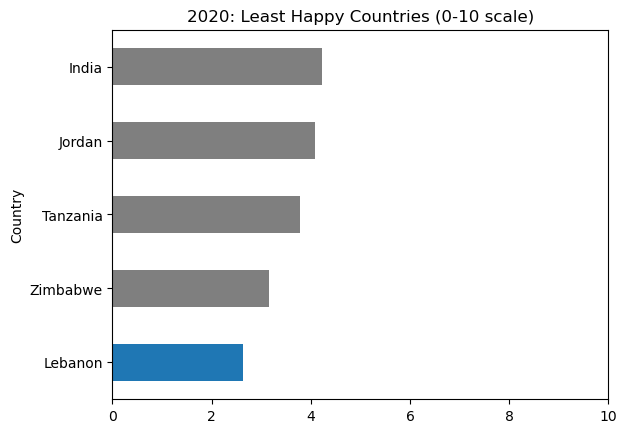

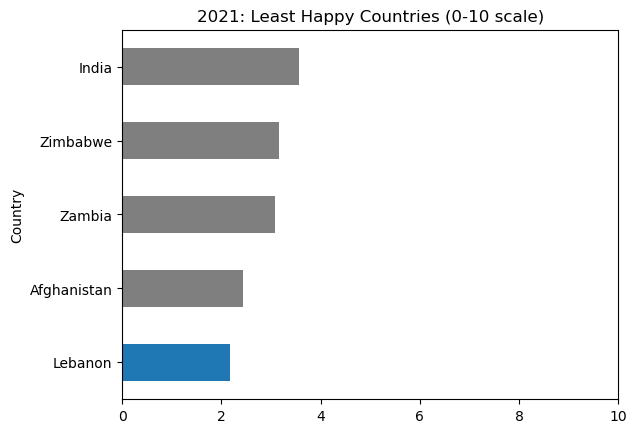

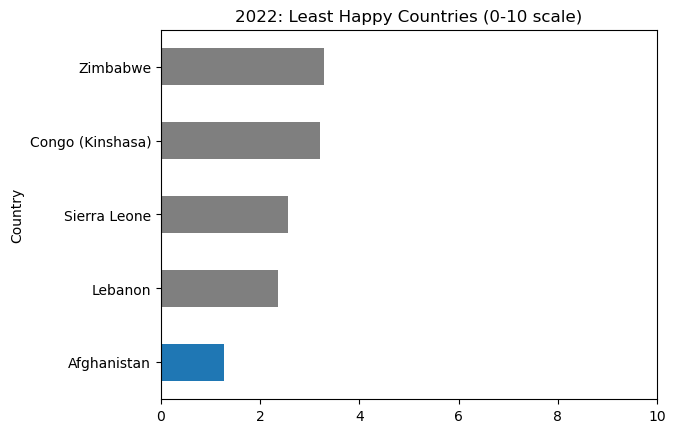

In [65]:
for year in years:
    ret = ranksByYear[year].iloc[0:5].plot(kind="barh", color=bottom_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title= str(year)+": Least Happy Countries (0-10 scale)",xlim=[0,10])
    filename = str(year) + "HappiestBottom5"
    plt.savefig("Output/" + filename)

In [66]:
# Look for countries with the the biggest changes in happiness scores
# Look for largest fluctuation, postive and negative, anywhere within the years 
# and the largest fluctuation, positive and negative, from first survey to last survey
happinessAgg = pd.DataFrame()
happinessAgg["Max"] = worldHappinessData.groupby(["Country Name"]).max()["Life Ladder"]
happinessAgg["Min"] = worldHappinessData.groupby(["Country Name"]).min()["Life Ladder"]
happinessAgg['Participation'] = worldHappinessData.groupby(["Country Name"]).size()

In [67]:
# drop all rows with 5 years or less of participation
indexDrop = happinessAgg[happinessAgg['Participation'] <= 5].index
happinessAgg.drop(indexDrop , inplace=True)


In [68]:
#find the year of the Max and Min happiness scores and the delta between max and min
#find the delta from first survey year to last survey year
maxYear = []
minYear = []
delta = []
endToEndDelta = []
countries = happinessAgg.index.tolist()
for country in countries:   
    country_max = happinessAgg.loc[[country]]['Max'][0]
    country_min = happinessAgg.loc[[country]]['Min'][0]
    max_year = worldHappinessData.loc[(worldHappinessData['Country Name'] == country) & (worldHappinessData['Life Ladder'] == country_max)]['Year'].iloc[0]
    min_year = worldHappinessData.loc[(worldHappinessData['Country Name'] == country) & (worldHappinessData['Life Ladder'] == country_min)]['Year'].iloc[0]
    country_rows = worldHappinessData[(worldHappinessData['Country Name'] == country)].sort_values(by='Year')
    first_year = country_rows.iloc[0]['Life Ladder']
    last_year = country_rows.iloc[-1]['Life Ladder']
    maxYear.append(max_year)
    minYear.append(min_year) 
    if max_year < min_year:
        delta.append(-(country_max - country_min))
    else:
        delta.append(country_max - country_min)
    endToEndDelta.append(last_year - first_year)
    
# add the new columns
happinessAgg['Min Year'] = minYear
happinessAgg['Max Year'] = maxYear
happinessAgg['Max Delta'] = delta
happinessAgg['End To End Delta'] = endToEndDelta

In [69]:
happinessAgg

,Max,Min,Participation,Min Year,Max Year,Max Delta,End To End Delta
Country Name,,,,,,,
Afghanistan,4.758381,1.281271,14,2022,2010,-3.477110,-2.442319
Albania,5.867422,4.511101,15,2016,2011,-1.356321,0.577961
Algeria,6.354898,4.744627,10,2019,2014,-1.610271,-0.246549
Argentina,6.775805,5.792797,17,2018,2011,-0.983009,-0.051932
Armenia,5.488087,4.177582,16,2009,2019,1.310505,1.092632
...,...,...,...,...,...,...,...
Venezuela,7.478455,4.041115,17,2016,2010,-3.437340,-1.220629
Vietnam,6.266509,5.022699,17,2013,2022,1.243810,0.972849
Yemen,4.809259,2.982674,12,2015,2009,-1.826585,-0.280220


2012 2018


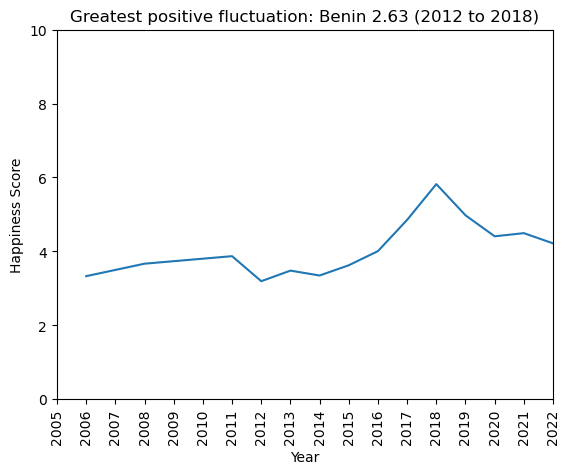

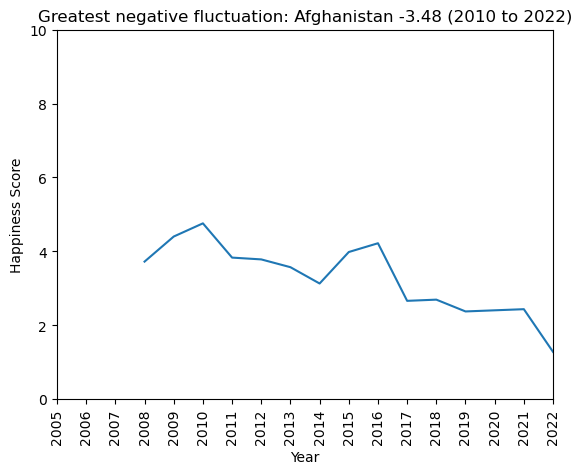

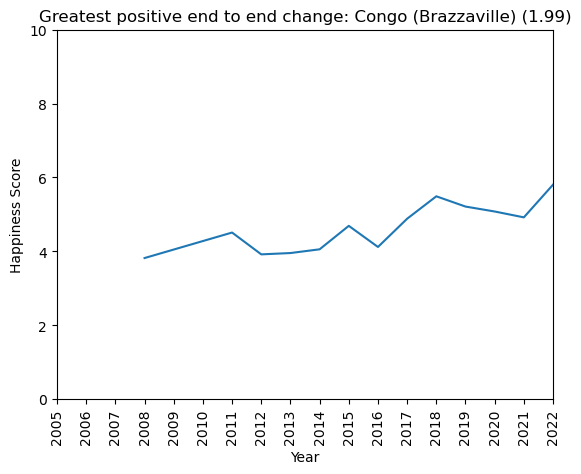

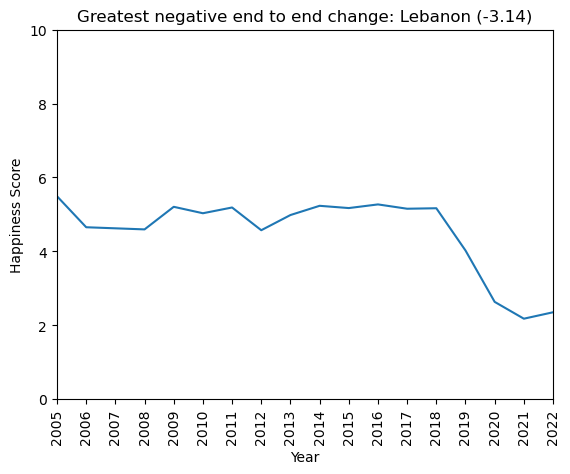

In [70]:
def happinessEndToEndLineGraph(country, deltaValue, filename):
    # draw a line graph of the happiness score for the country over time
    # deltaValue is the magnitude and direction of the change
    # filename is the name of the file to save a copy of the graph
    
   
    # this is a maximum delta
    if (deltaValue > 0):
        # positive change
        title = "Greatest positive end to end change: "
    else:
        # negative change
        title = "Greatest negative end to end change: "
   
    # create graph
    delta_str = f"{deltaValue:.2f}"
    title = title + country + " (" + delta_str + ")"
    ax = worldHappinessData[worldHappinessData['Country Name'] == country].plot(kind="line",x='Year',y='Life Ladder', title=title,ylim = [0,10],xlim=[2005,2022],legend=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Happiness Score')
    ax.set_xticks(range(2005, 2023))
    plt.xticks(rotation=90)
    plt.savefig("Output/" + filename)
    
def happinessFluctuationLineGraph(country, maxYear, minYear, deltaValue, filename):
    # draw a line graph of the happiness score for the country over time
    # maxYear is the high point
    # minYear is the low point
    # deltaValue is the magnitude and direction of the change
    # filename is the name of the file to save a copy of the graph
    
    
    # this is an internal delta
    if (deltaValue > 0):
        # positive end to end
        title = "Greatest positive fluctuation: "
        first_year = str(minYear)
        last_year = str(maxYear)
    else:
        # negative end to end
        title = "Greatest negative fluctuation: "
        first_year = str(maxYear)
        last_year = str(minYear)
    # create graph
    delta_str = f"{deltaValue:.2f}"
    title = title + country + " " + delta_str + " (" + first_year + " to " + last_year + ")"
    ax = worldHappinessData[worldHappinessData['Country Name'] == country].plot(kind="line",x='Year',y='Life Ladder', title=title,ylim = [0,10],xlim=[2005,2022],legend=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Happiness Score')
    ax.set_xticks(range(2005, 2023))
    plt.xticks(rotation=90)
    plt.savefig("Output/" + filename)
    
# make a Happiness score graph of the countries with the biggest changes over time, both by magnitude anywhere in the years
# and by magnitude from the first year of the survey to the last year of the survey

delta = happinessAgg['Max Delta'].max()
country = happinessAgg.index[happinessAgg['Max Delta'] == delta].tolist()[0]
minYear = int(happinessAgg.loc[country]['Min Year'])
maxYear = int(happinessAgg.loc[country]['Max Year'])
print(minYear,maxYear)
happinessFluctuationLineGraph(country, maxYear, minYear, delta, "maxPosDelta.png")
delta = happinessAgg['Max Delta'].min()
country = happinessAgg.index[happinessAgg['Max Delta'] == delta].tolist()[0]
minYear = int(happinessAgg.loc[country]['Min Year'])
maxYear = int(happinessAgg.loc[country]['Max Year'])
happinessFluctuationLineGraph(country, maxYear, minYear, delta, "maxNegDelta.png")
delta = happinessAgg['End To End Delta'].max()
country = happinessAgg.index[happinessAgg['End To End Delta'] == delta].tolist()[0]
happinessEndToEndLineGraph(country, delta, "maxPosEndToEnd.png")
delta = happinessAgg['End To End Delta'].min()
country = happinessAgg.index[happinessAgg['End To End Delta'] == delta].tolist()[0]
happinessEndToEndLineGraph(country, delta, "maxNegEndToEnd.png")